# Classification Uncertainty Analysis in Bayesian Deep Learning with Dropout Variational Inference

Here is [astroNN](https://github.com/henrysky/astroNN), please take a look if you are interested in astronomy or how neural network applied in astronomy
* **Henry Leung** - *Astronomy Undergraduate, University of Toronto* - [henrysky](https://github.com/henrysky)
* Project adviser: **Jo Bovy** - *Professor, Department of Astronomy and Astrophysics, University of Toronto* - [jobovy](https://github.com/jobovy)
* Contact Henry: henrysky.leung [at] mail.utoronto.ca
* This tutorial is created on 16/Mar/2018 with Keras 2.1.5, Tensorflow 1.6.0, Nvidia CuDNN 7.0 for CUDA 9.0 (Optional)

<br>
For more resources on Bayesian Deep Learning with Dropout Variational Inference, please refer to [README.md](https://github.com/henrysky/astroNN/tree/master/demo_tutorial/NN_uncertainty_analysis)

#### First import everything we need

In [1]:
%matplotlib inline

from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
import pylab as plt

from astroNN.models import MNIST_BCNN

C:\Users\Henry\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Train the neural network on MNIST training set

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train = np_utils.to_categorical(y_train, 10)
y_train = y_train.astype(np.float32)
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

# Create a astroNN neural network instance and set the basic parameter
net = MNIST_BCNN()
net.task = 'classification'
net.max_epochs = 1  # Just use 5 epochs for quick result

# Trian the nerual network
net.train(x_train, y_train)

Number of Training Data: 54000, Number of Validation Data: 6000
====Message from Normalizer====
You selected mode: 255
Featurewise Center: False
Datawise Center: False
Featurewise std Center: False
Datawise std Center: False
====Message ends====
====Message from Normalizer====
You selected mode: 0
Featurewise Center: False
Datawise Center: False
Featurewise std Center: False
Datawise std Center: False
====Message ends====
Sorry but there is a known issue of the loss not handling loss correctly. I will fix it in May-- Henry 19 April 2018
Epoch 1/1
 - 34s - loss: 0.4882 - output_loss: 0.4180 - variance_output_loss: 0.4183 - output_categorical_accuracy: 0.8834 - val_loss: 0.2392 - val_output_loss: 0.1691 - val_variance_output_loss: 0.1691 - val_output_categorical_accuracy: 0.9518
Completed Training, 34.70s in total


### Test the neural network on random MNIST images

You can see from below, most test images are right except the last one the model has a high uncertainty in it. As a human, you can indeed can argue this 5 is badly written can can be read as 6 or even a badly written 8.

Starting Dropout Variational Inference
Completed Dropout Variational Inference with 100 forward passes, 0.21s in total


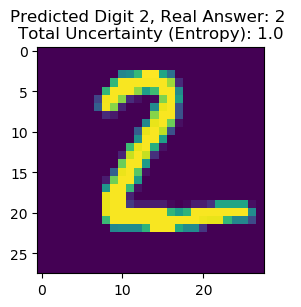

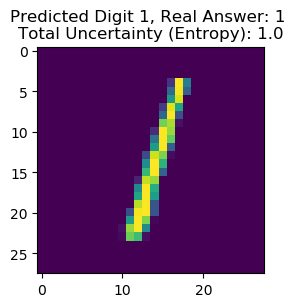

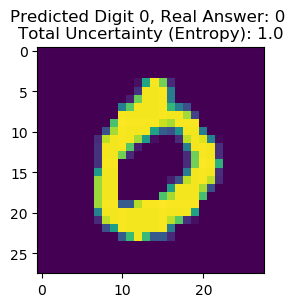

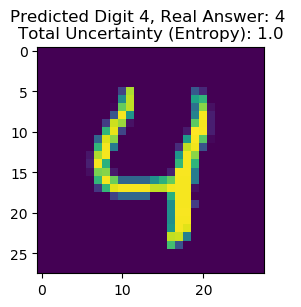

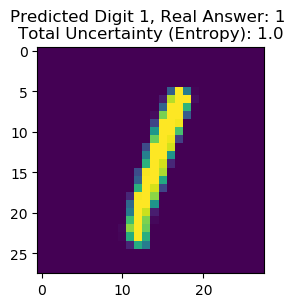

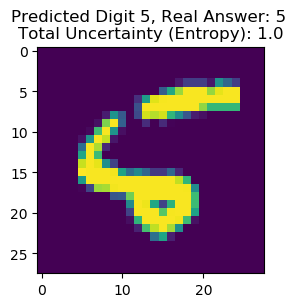

In [3]:
test_idx = [1, 2, 3, 4, 5, 8]
pred, pred_std = net.test(x_test[test_idx])
for counter, i in enumerate(test_idx):
    plt.figure(figsize=(3, 3), dpi=100)
    plt.title(f'Predicted Digit {pred[counter]}, Real Answer: {y_test[i]:{1}} \n'
              f'Total Uncertainty (Entropy): {(pred_std["total"][counter]):.{2}}')
    plt.imshow(x_test[i])
    plt.show()
    plt.close('all')
    plt.clf()

### Test the neural network on random MNIST images with 90 degree rotation

Since the neural network is trained on MNIST images without any data argumentation, so if we rotate the MNIST images, the images should look 'alien' to the neural network and the neural network should give us a high unceratinty. And indeed the neural network tells us its very uncertain about the prediction with roated images.

Starting Dropout Variational Inference
Completed Dropout Variational Inference with 100 forward passes, 0.13s in total


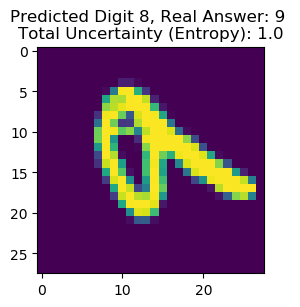

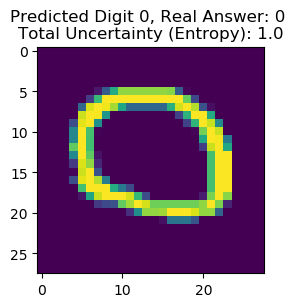

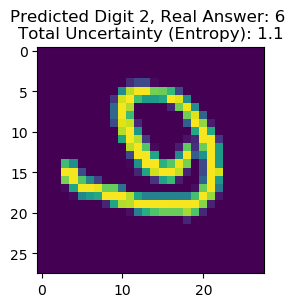

In [4]:
test_rot_idx = [9, 10, 11]

test_rot = x_test[test_rot_idx]

for counter, j in enumerate(test_rot):
    test_rot[counter] = np.rot90(j)

pred_rot, pred_rot_std = net.test(test_rot)

for counter, i in enumerate(test_rot_idx):
    plt.figure(figsize=(3, 3), dpi=100)
    plt.title(f'Predicted Digit {pred_rot[counter]}, Real Answer: {y_test[i]:{1}} \n'
              f'Total Uncertainty (Entropy): {(pred_rot_std["total"][counter]):.{2}}')
    plt.imshow(test_rot[counter])
    plt.show()
    plt.close('all')
    plt.clf()